In [32]:
# Import Libraries
import os
import gc
import shutil
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings("ignore")

import xml.etree.ElementTree as xet

In [ ]:
!git clone https://github.com/ultralytics/ultralytics


!pip install ultralytics
!pip install -U ray[tune]

Cloning into 'ultralytics'...
remote: Enumerating objects: 46566, done.
remote: Counting objects: 100% (449/449), done.
remote: Compressing objects: 100% (295/295), done.
remote: Total 46566 (delta 341), reused 156 (delta 154), pack-reused 46117 (from 4)
Receiving objects: 100% (46566/46566), 39.47 MiB | 22.77 MiB/s, done.
Resolving deltas: 100% (34530/34530), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 11.4 MB/s eta 0:00:00


In [ ]:
%%writefile /content/ultralytics/config.yaml

path: /content/drive/MyDrive/Smart_Traffic_Management_System/Data/Dataset/images
train: /content/drive/MyDrive/Smart_Traffic_Management_System/Data/Dataset/images/train
val: /content/drive/MyDrive/Smart_Traffic_Management_System/Data/Dataset/images/val

nc: 1

names: [
    'license_plate'
]

Overwriting /content/ultralytics/config.yaml


In [ ]:
# dataset
#   images
#     train
#     test
#     val
#   labels
#     train
#     test
#     val

In [ ]:
!wandb disabled

# !yolo train model=yolov8n.pt data="/content/ultralytics/config.yaml" epochs=10 verbose=True batch=16

# !yolo task=detect mode=train model=yolov8n.pt data="/content/ultralytics/config.yaml" epochs=300 plots=True

!yolo task=detect mode=train model="/content/drive/MyDrive/Smart_Traffic_Management_System/best.pt" data="/content/ultralytics/config.yaml" epochs=300 plots=True

W&B disabled.
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Smart_Traffic_Management_System/best.pt, data=/content/ultralytics/config.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

In [ ]:
!yolo task=detect mode=val model="/content/drive/MyDrive/Smart_Traffic_Management_System/best.pt" data="/content/ultralytics/config.yaml"

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv3-tiny summary (fused): 63 layers, 12,128,178 parameters, 0 gradients, 18.9 GFLOPs
val: Scanning /content/drive/MyDrive/Smart_Traffic_Management_System/Data/Dataset/labels/val... 0 images, 95 backgrounds, 0 corrupt: 100% 95/95 [00:00<00:00, 124.58it/s]
val: WARNING ⚠️ No labels found in /content/drive/MyDrive/Smart_Traffic_Management_System/Data/Dataset/labels/val.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: WARNING ⚠️ Cache directory /content/drive/MyDrive/Smart_Traffic_Management_System/Data/Dataset/labels is not writeable, cache not saved.
WARNING ⚠️ No labels found in /content/drive/MyDrive/Smart_Traffic_Management_System/Data/Dataset/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [0

In [38]:
# # Get Bounding Box Predictions
from ultralytics import YOLO

path = "/content/drive/MyDrive/Smart_Traffic_Management_System/Data/Dataset/images/train/BR15.jpg"

yolo_model = YOLO('/content/drive/MyDrive/Smart_Traffic_Management_System/latest_best.pt')
bbox_results = yolo_model.predict(path, verbose=False)

In [39]:
all_box_list = []
all_conf_list = []


for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

In [40]:
all_conf_list

[[0.92]]

In [41]:
# for i in bbox_results:
#   print(i.boxes)

print(all_box_list[0])
print(all_conf_list)


# for i, box in enumerate(boxes):
#   print(i, box)

[[77, 123, 144, 166]]
[[0.92]]


In [42]:
ori_path = path
print(ori_path)
ori_image = cv2.imread(ori_path)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

/content/drive/MyDrive/Smart_Traffic_Management_System/Data/Dataset/images/train/BR15.jpg


In [43]:
from ultralytics.utils.plotting import Annotator


annotator = Annotator(ori_image)
boxes = all_box_list
confs = all_conf_list

In [44]:
for i in all_box_list[0]:
  print(i)

[77, 123, 144, 166]


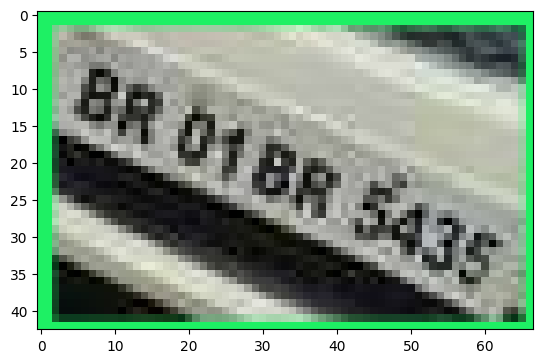

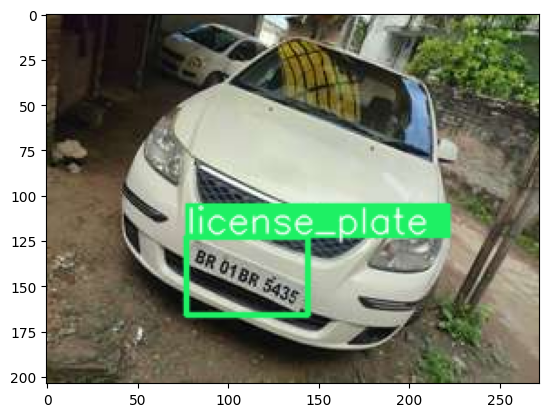

In [45]:
import matplotlib.pyplot as plt

# for i, box in enumerate(boxes):
#   print(i)
# box = all_box_list[0][0]

for i in all_box_list[0]:
  box = i
  confs = 0.120
  annotator.box_label(box=box, label="license_plate ", color=(30, 240, 100))

  # Get Plate Object
  x1, y1, x2, y2 = box
  x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
  roi = ori_image[y1:y2, x1:x2]
  plt.imshow(roi)
  plt.show()

  # Show Image
  frame = annotator.result()
  plt.imshow(frame)
  plt.show()

In [46]:
print(all_box_list)

[[[77, 123, 144, 166]]]


In [47]:
all_conf_list

[[0.92]]